# SUBMITTED BY : SAHIB BIR SINGH BHATIA 




# STUDENT ID: 201547831 

# EMAIL: S.Bhatia2@liverpool.ac.uk

# TRAINING MLP NETWORK WITH GA

In [6]:
"""Importing Libraries"""
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.pyplot as plt
import random   

In [147]:
class NeuralNetworkForGA(object):
    def __init__(self,inp,hi,out,act,labels):
        # parameters
        self.inputLayerSize = inp                      
        self.hiddenLayerSize = hi                     
        self.outputLayerSize = out                      
        self.alpha = 0.1                   
        self.max_epochs = 0                     
        self.BiasHiddenValue = -1                  
        self.BiasOutputValue = -1                  
        self.activation = self.activationList[str(act)]
        self.deriv = self.derivativeList[str(act)]
        self.classes_number = labels
        self.WEIGHT_hidden = [[2  * random.random() - 1 for i in range(self.hiddenLayerSize)] 
                              for j in range(self.inputLayerSize)]
        self.WEIGHT_output = [[2  * random.random() - 1 for i in range(self.outputLayerSize)] 
                              for j in range(self.hiddenLayerSize)]
        self.BIAS_hidden = np.array([self.BiasHiddenValue 
                                     for i in range(self.hiddenLayerSize)])
        self.BIAS_output = np.array([self.BiasOutputValue 
                                     for i in range(self.outputLayerSize)])
        

    activationList = {
         'sigmoid': (lambda s: 1/(1 + np.exp(-s))),
            'tanh': (lambda t: np.tanh(t)),
            'Relu': (lambda r: r*(r > 0)),
               }
    derivativeList = {
         'sigmoid': (lambda s: s*(1-s)),
            'tanh': (lambda t: 1-t**2),
            'Relu': (lambda r: 1 * (r>0))
               }
        
       
      
    def f(self,P):
        X = np.array(([0,0], [0,1], [1, 0], [1,1]), dtype=float)  
        y = np.array(([0], [1], [1], [0]), dtype=float)
        self.WEIGHT_hidden = P[:6].reshape((2,3))
        self.BIAS_hidden = P[6:9].reshape((3,1))
        self.WEIGHT_output = P[9:12].reshape((3,1))
        self.BIAS_output = P[12:].reshape((1,1))
        self.OUTPUT_L1 = self.activation((np.dot(X, self.WEIGHT_hidden) + self.BIAS_hidden.T))
        self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
        e = np.sum(0.5*(y - self.OUTPUT_L2)**2)
        return e
        
    def optimizer(self,mp,cp): 
        """GA optimizer function""" # 2X3  + 3X1 + 3 + 1 = 6 + 3 + 3 +1 = 13
        d = 13  # d = (inputNeirons X hiddenNeurons) + (HiddenNeirons X OutputNeurons) + hiddenNeurons + outputNeurons
        boundary = np.c_[np.zeros(d) - 10, np.zeros(d) + 10]
        algorithm_param = {'max_num_iteration': 300,'population_size':100,
                           'mutation_probability':mp,'elit_ratio': 0.01,
                   'crossover_probability': cp,'parents_portion': 0.3,
                           'crossover_type':'uniform',
                   'max_iteration_without_improv':None}
        
        
        model=ga(function=self.f,\
            dimension=d,\
            variable_type='real',\
            variable_boundaries=boundary,\
            algorithm_parameters=algorithm_param)
        model.run()

 The best solution found:                                                                           
 [-6.0588841  -4.22868161 -9.19521046  3.80473598 -5.20165025 -9.90302534
 -3.44142445  7.15570297  3.94989248  5.16345447  9.81199424 -9.91362113
 -5.28458053]

 Objective function:
 0.00027203210775418027


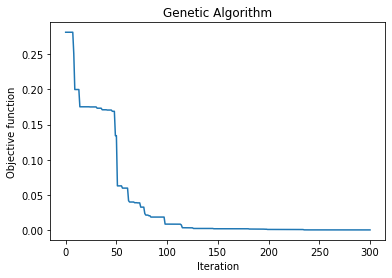

In [137]:
#Default values
NN1_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN1_GA.optimizer(0.01,0.5)

# EXPERIMENT 1: MUTATION

 The best solution found:                                                                           
 [-5.1665877  -9.76084229 -9.71850973  8.00370653  8.38398901  9.14916482
  3.18072481 -3.11488486  5.88281585 -4.3285516   9.96753381 -7.22477126
  5.94362481]

 Objective function:
 0.00013331875807948384


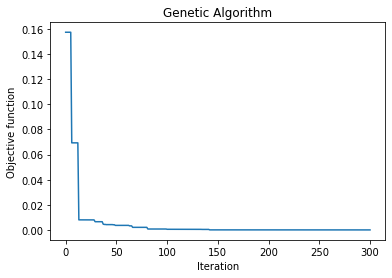

In [139]:
# changing Mutation Probability to 0.005
NN2_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN2_GA.optimizer(0.005,0.5)

 The best solution found:                                                                           
 [ 6.29412048  0.07367178 -9.0757239  -4.32121069 -8.12950167  6.65081428
  1.12892425 -8.42004486  5.02449389 -5.41261271  0.06556996 -6.03911392
  8.06737037]

 Objective function:
 0.021101359160181663


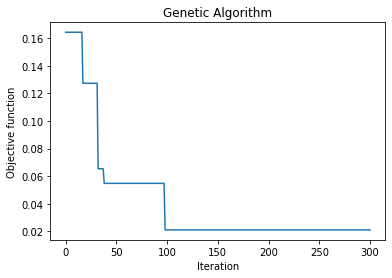

In [140]:
# changing Mutation Probability to 0.9
NN3_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN3_GA.optimizer(0.9,0.5)

# EXPERIMENT 2: CROSSOVER

 The best solution found:                                                                           
 [ 9.36694141  6.13340036 -9.68004611  8.54876817 -9.46372443  9.1662502
 -1.72862285 -2.87620513 -4.97685243  4.85561899  9.73127029  9.29503962
 -9.16264131]

 Objective function:
 0.00014947650497890077


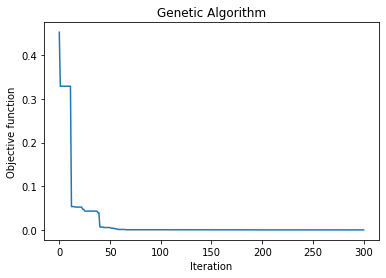

In [141]:
# changing Crossover Probability to 0.1
NN4_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN4_GA.optimizer(0.05,0.1)

 The best solution found:                                                                           
 [ 9.99543472  9.94612387  8.45596278 -9.21987279 -7.70919766 -9.52506539
  4.85539639  4.89548557 -4.19326596 -4.49107825 -6.22397188  9.28392862
  5.92310012]

 Objective function:
 0.0001782130775833309


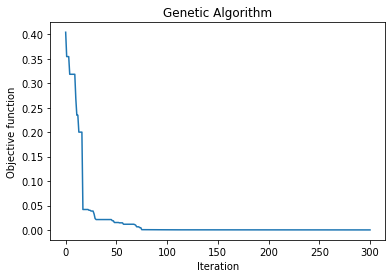

In [142]:
# changing Crossover Probability to 0.9
NN5_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN5_GA.optimizer(0.05,0.9)

# EXPERIMENT 3: Standard GA vs Elitist GA

 The best solution found:                                                                           
 [-9.22817883 -7.44992353 -8.81087877 -8.69547323  5.73478229  8.90520974
 -3.27197839 -3.46874897  4.53491764  2.94820941  5.77364133 -7.17774093
  3.93724783]

 Objective function:
 0.00971433193583474


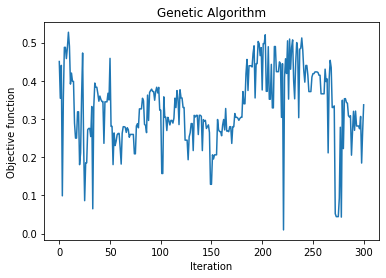

In [144]:
# Standard GA
NN6_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN6_GA.optimizer(0.05,0.5)

 The best solution found:                                                                           
 [-9.88482254  8.34407399  9.04994305  7.25183813  5.0409174  -8.78918673
 -2.80967581 -1.08322762 -5.11718111  9.94641107  3.79687637  9.93899438
 -9.17177353]

 Objective function:
 0.000167389427931769


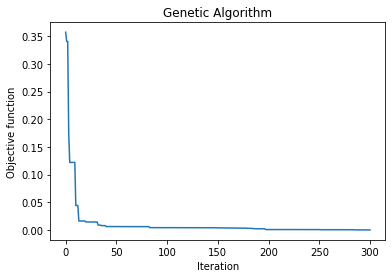

In [146]:
#Elitist GA
NN7_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN7_GA.optimizer(0.05,0.5)

# EXPERIMENT 4: STOPPING CRITERIA

 The best solution found:                                                                           
 [ 9.78315578  5.54175819  8.05424505  6.85991468 -9.2527088  -7.58144311
 -1.9669065  -2.78539184  3.96253239  2.38719741  9.98037788 -9.95376563
  2.92015004]

 Objective function:
 0.00012069258664216783


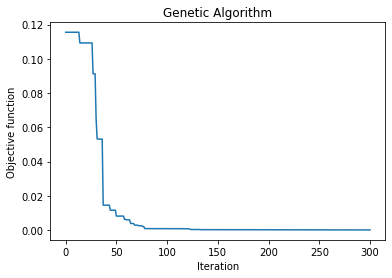

In [149]:
# Implmenting Stopping Criteria with max_teration_without_improv = 100
NN8_GA = NeuralNetworkForGA(2,3,1,"sigmoid",2)
NN8_GA.optimizer(0.05,0.5)

# TRAINING MLP NETWORK WITH PSO

In [152]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
class NeuralNetworkForPSO(object):
    def __init__(self,inp,hi,out,act,labels):
        # parameters
        self.inputLayerSize = inp                      
        self.hiddenLayerSize = hi                     
        self.outputLayerSize = out                      
        self.alpha = 0.1                   
        self.max_epochs = 0                     
        self.BiasHiddenValue = -1                  
        self.BiasOutputValue = -1                  
        self.activation = self.activationList[str(act)]
        self.deriv = self.derivativeList[str(act)]
        self.classes_number = labels
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = [[2  * random.random() - 1 for i in range(self.hiddenLayerSize)] 
                              for j in range(self.inputLayerSize)]
        self.WEIGHT_output = [[2  * random.random() - 1 for i in range(self.outputLayerSize)] 
                              for j in range(self.hiddenLayerSize)]
        self.BIAS_hidden = np.array([self.BiasHiddenValue 
                                     for i in range(self.hiddenLayerSize)])
        self.BIAS_output = np.array([self.BiasOutputValue 
                                     for i in range(self.outputLayerSize)])
        

    activationList = {
         'sigmoid': (lambda s: 1/(1 + np.exp(-s))),
            'tanh': (lambda t: np.tanh(t)),
            'Relu': (lambda r: r*(r > 0)),
               }
    derivativeList = {
         'sigmoid': (lambda s: s*(1-s)),
            'tanh': (lambda t: 1-t**2),
            'Relu': (lambda r: 1 * (r>0))
               }
        
    def forward_prop(self,params):
        X = np.array(([0,0], [0,1], [1, 0], [1,1]), dtype=float)
        y = np.array(([0], [1], [1], [0]), dtype=float)
        self.WEIGHT_hidden = params[:6].reshape((2,3))
        self.BIAS_hidden = params[6:9].reshape((3,1))
        self.WEIGHT_output = params[9:12].reshape((3,1))
        self.BIAS_output = params[12:].reshape((1,1))
        self.OUTPUT_L1 = self.activation((np.dot(X, self.WEIGHT_hidden) + self.BIAS_hidden.T))
        self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
        e = np.sum(0.5*(y - self.OUTPUT_L2)**2)
        return e
    
    
    def allParticles(self,x):
        j = []
        n_particles = x.shape[0]
        for i in range(n_particles):
            e = self.forward_prop(x[i])
            j.append(e)
        return np.array(j)
        

    def swarmOptimizer(self):  # 2X3   + 3X1 + 3 + 1 = 6 + 3 + 3 + 1 = 13
        d = 13   # d = (inputneurons X hiddenNeurons) + (hiddenNeurons X ouputNeurons) + hiddenneurons + ouputNeurons
        x_max = np.zeros(d) + 10
        x_min = np.zeros(d) - 10
        bounds = (x_min, x_max)
        options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
        opti = ps.single.GlobalBestPSO(n_particles=100,dimensions=d,
                                       options=options,bounds=bounds,velocity_clamp=(2,4))
        cost, pos = opti.optimize(self.allParticles, iters=100)
        plot_cost_history(cost_history=opti.cost_history)
        plt.show()

2021-07-16 12:52:52,816 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000448
2021-07-16 12:52:53,279 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0004475050930645364, best pos: [ 6.2752784   9.4829326  -8.73019081  6.01784283  5.09979186 -7.7748857
 -9.18936122 -2.12519679  3.74103383 -9.41620553  5.45026435 -4.24450437
 -0.55131209]


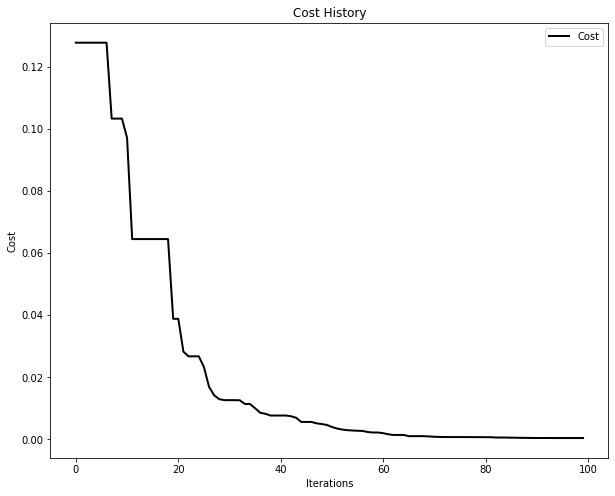

In [153]:
# Default Values
pso1 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso1.swarmOptimizer()

# EXPERIMENT 1: INERTIA WEIGHT

2021-07-16 09:44:43,593 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.4}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.01 
2021-07-16 09:44:44,030 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.01003276687357573, best pos: [-4.79637795 -4.73430428 -3.29377085  4.98054275  7.72497392  2.11584191
 -2.18209065  2.21937753 -4.03917218  8.45270113 -6.56552545 -7.5661153
  2.73850909]


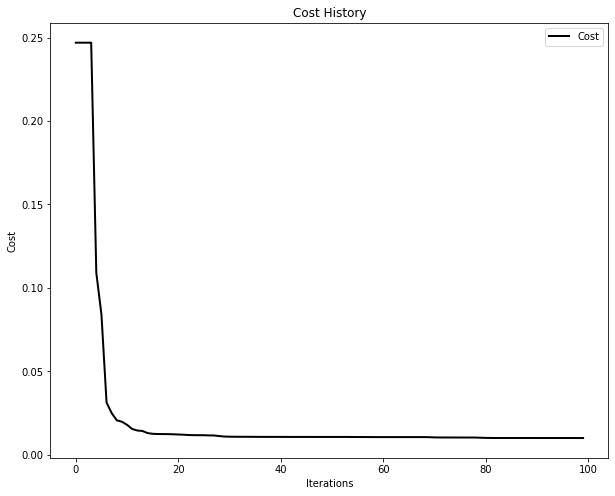

In [84]:
# w = 0.4
pso2 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso2.swarmOptimizer()

# EXPERIMENT 2: ACCELERATION CONSTANTS

2021-07-16 09:47:49,324 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.0, 'c2': 0.0, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.241
2021-07-16 09:47:49,757 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2412714275555361, best pos: [-9.27583003 -9.20270985  5.66947559  6.8082667   2.68261737  7.87408257
  5.41094017 -1.76085101  6.23407538 -9.2451313   6.69393052  9.95334125
 -1.49740242]


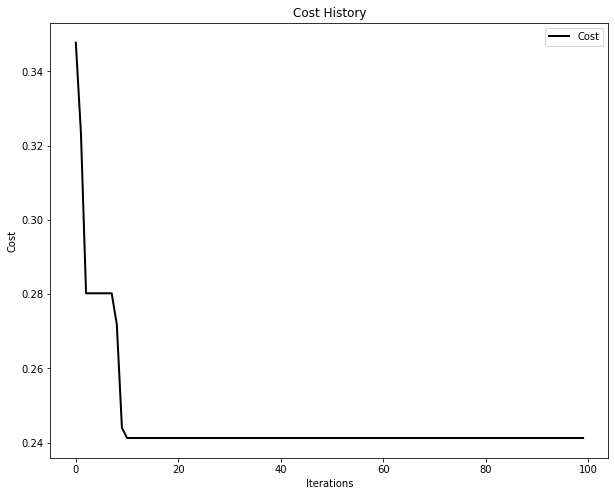

In [86]:
# c1 = c2 = 0
pso3 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso3.swarmOptimizer()

2021-07-16 09:50:40,186 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.0, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.0154
2021-07-16 09:50:40,621 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.015401907709317776, best pos: [ 0.13135128 -8.72487476 -4.56977307  2.44888004  6.47354133  8.64846209
 -4.56896321  4.19073273 -6.98931881 -2.975607   -8.99097679  9.594848
  2.87344208]


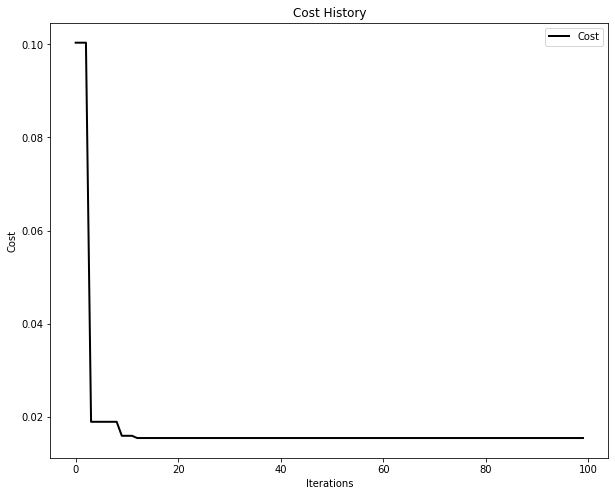

In [88]:
# c1 = 0
pso4 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso4.swarmOptimizer()

2021-07-16 09:52:46,066 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.0, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.225
2021-07-16 09:52:46,506 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.22511937344025182, best pos: [-7.3346157   3.16519833  1.91795752  7.82465052 -2.64183696 -6.92560921
 -4.88180459 -4.58986709 -5.42034775  3.39323206  3.96406518  4.39001266
 -0.8638872 ]


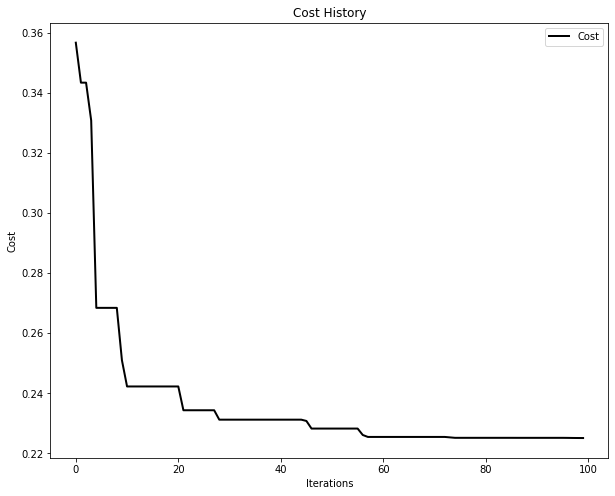

In [90]:
# c2 = 0
pso5 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso5.swarmOptimizer()

# EXPERIMENT 3: NUMBER OF PARTICLES

2021-07-16 09:58:07,974 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000628
2021-07-16 09:58:08,257 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0006279779655537515, best pos: [-7.29848358  9.72462637  5.44359702 -1.58798536  5.26186149  4.75866488
  0.44560844 -2.15883213 -8.04085273 -0.35472856  9.59300832 -9.88496148
 -4.90963296]


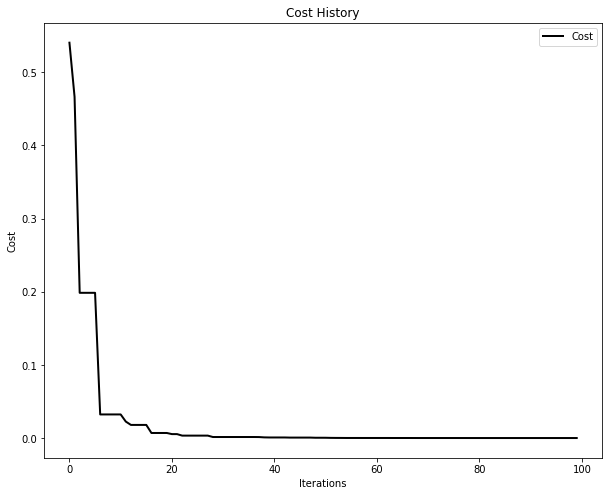

In [94]:
# n_particles= 50
pso6 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso6.swarmOptimizer()

2021-07-16 09:59:28,392 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.00873
2021-07-16 09:59:28,719 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.008730443057812653, best pos: [-1.38083075 -2.85309437  5.22204519 -2.93661396  4.93652795 -8.9635894
 -6.70273582 -3.97205076 -2.80764234  3.61088323  8.81084186  8.91901809
 -3.31560177]


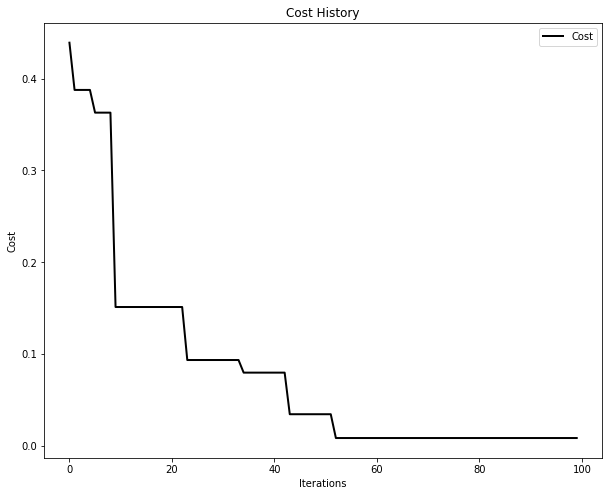

In [98]:
# n_particles= 65
pso7 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso7.swarmOptimizer()

2021-07-16 10:00:06,510 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000567
2021-07-16 10:00:06,888 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0005667547345579964, best pos: [-5.98331926  9.18851533  4.83079944  6.44178424 -9.01485992  5.67608793
 -2.96130982 -3.86016896  4.66558606  9.2015436   8.96094498  2.38939654
 -7.26615831]


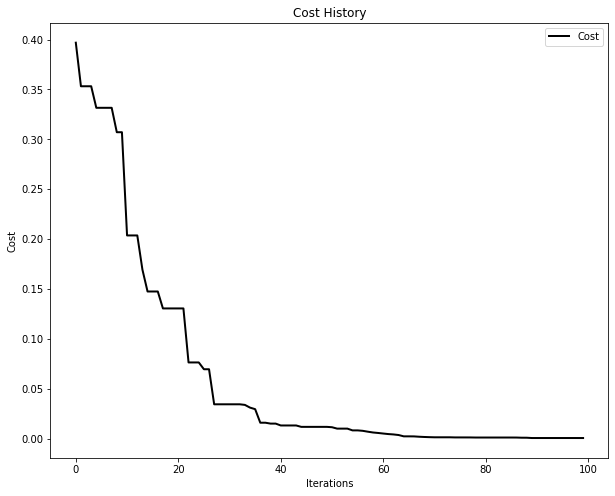

In [100]:
# n_particles= 80
pso8 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso8.swarmOptimizer()

2021-07-16 10:00:37,154 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000107
2021-07-16 10:00:37,664 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00010708929872764717, best pos: [-7.82180649 -8.02077076 -7.78841461  8.16509665  8.73057361  5.14747771
 -6.91375975  3.70185647 -4.27645696  9.39758501 -9.86031154  5.92651588
  4.74773957]


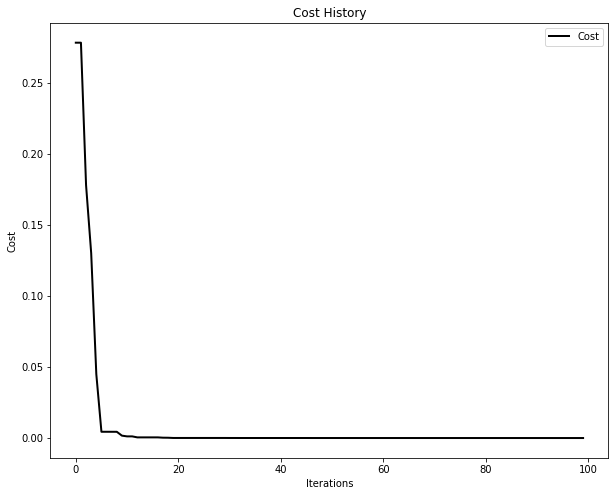

In [102]:
# n_particles= 120
pso9 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso9.swarmOptimizer()

2021-07-16 10:04:52,279 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000235
2021-07-16 10:04:52,871 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00023483994096391237, best pos: [-4.00717214  8.72259785 -5.92328847 -4.01382981 -5.75995484  9.25563245
  5.75904487 -4.76523382 -5.46534116  2.62696042  9.53863129  9.90318581
 -7.288834  ]


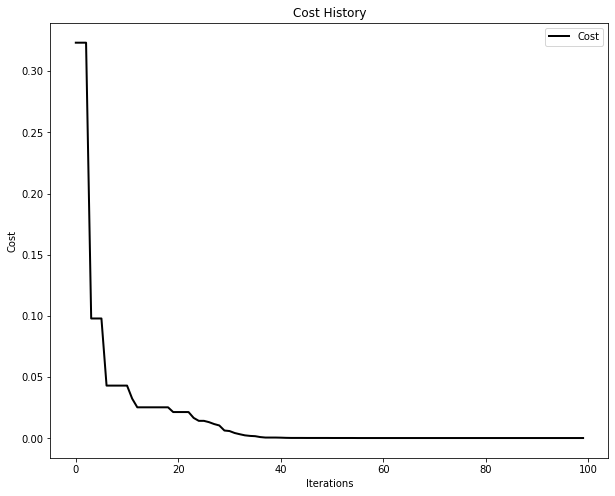

In [104]:
# n_particles= 150
pso10 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso10.swarmOptimizer()

2021-07-16 10:21:02,728 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.264
2021-07-16 10:21:03,176 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2641423757363261, best pos: [ 7.13021179  7.54399256  9.04320132  1.37928516 -4.45325143  3.94892551
 -2.00698568 -3.66378104 -0.79675609 -4.73141444  3.97403966  3.96377674
 -0.75826283]


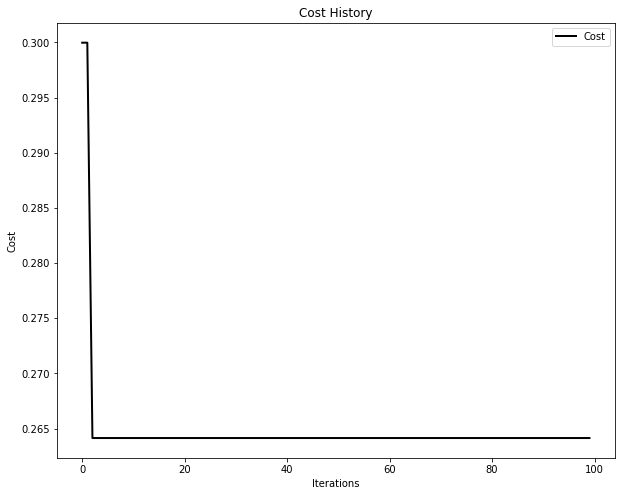

In [111]:
# Vmin,Vmax = (0,2)
pso11 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso11.swarmOptimizer()

# EXPERIMENT 4: MAXIMUM VELOCITY

2021-07-16 10:23:23,099 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.0351
2021-07-16 10:23:23,538 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.035144981231246514, best pos: [ 6.83139194 -5.75457677  5.55309935  8.50172439  5.89478629 -5.61490233
  4.98850325  6.14162115  5.90836009  9.68931923 -9.84395251 -9.88260313
  8.44578724]


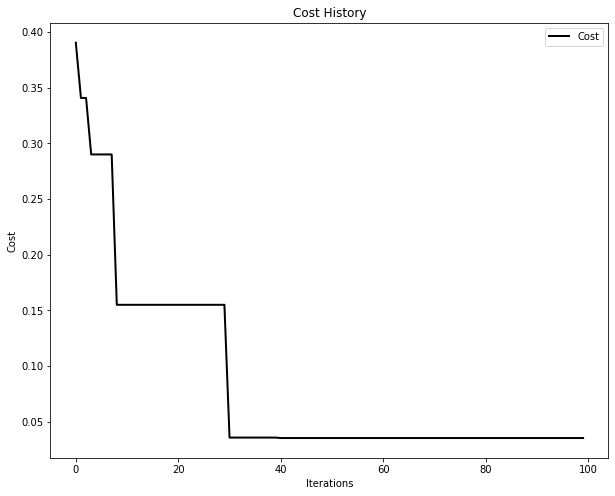

In [115]:
# Vmin,Vmax = (2,4)
pso12 = NeuralNetworkForPSO(2,3,1,"sigmoid",2)
pso12.swarmOptimizer()